# Исследование тарифных планов компании "Мегалайн"


##  Изучение данных из файлов

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt 
# импорт библиотеки matplotlib для продвинутой работы с графиками
import numpy as np
#импорт библиотеки  numpy для анализа данных, отвечает за математические функции
from scipy import stats as st
#импорт библиотеки  scipy для научных вычислений

In [3]:
df_calls.head() # получение первых 5 строк таблицы df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()
# получение общей информации о данных в таблице df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_internet.head()
# получение первых 5 строк таблицы df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
df_internet.info()
# получение общей информации о данных в таблице df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
df_messages.head() # получение первых 5 строк таблицы df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
df_messages.info()
# получение общей информации о данных в таблице df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
df_tariffs.head() # получение первых 5 строк таблицы df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
df_users.head()  # получение первых 5 строк таблицы df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
df_users.info() # получение общей информации о данных в таблице df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В выгруженных файлах видим информацию о пользователях и тарифных планах, которые они используют и данные о звонках, сообщениях и интернет-трафике. Данные в таблицах отличаются по количеству.


Столбцы с датами переведем в формат datatime

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Приведем столбец с датами в таблицах к типу данных datetime.

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y%m%dT')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y%m%dT')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y%m%dT')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y%m%dT')
# используем для этого метод to_datetime()
df_calls.info() # проверим сработал ли метод вызвав общую информацию для одной из таблиц

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


В описании проекта указано, что в данных таблицы df_calls  звонки с нулевой продолжительностью - это пропущенные звонки. Не будем их трогать.

В описании проекта так же указано, что "Мегалайн" всегда округляет секунды до минуты. Каждый звонок округляется отдельно: даже если он длится всего 1 секунду, будет засчитан как 1 минута. Округлим данные значения до большего целого числа.

In [13]:
df_calls['duration_ceil'] = df_calls['duration'].apply(np.ceil).astype('int')
# с помощью метода apply() применим ко всему столбцу duration датафрейма df_calls 
# округление в большую сторону используюя метод ceil 
# используя метод astype() переведем данные столбца в тип int
df_calls.head() #выведем на экран 5 первых строк датафрейма

,id,call_date,duration,user_id,duration_ceil
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


Все получилось как было задуманно, нули остались нулями, минуты округлились до целых чисел в большую сторону.

В датафрейме df_internet есть столбец 'Unnamed: 0' который дублирует индексацию. Удалим его.

In [14]:
del df_internet['Unnamed: 0']
# для удаления столбца используем оператор del
df_internet.info()
# выведем общую информацию по датафрейму  df_internet 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


<!-- Столбец Unnamed: 0 удален -->

Столбец Unnamed: 0 удален, столбец session_date имеет тип данных datetime. Больше вопросов к этой таблице нет.

С  таблицей df_messages и df_tariffs все впорядке.
Пропущенные значения в столбце churn_date датафрейма df_users говорят о том, что тариф на момент выгрузки таблицы еще действовал. Так как по условию исследования вопросов в данном направлении нет, не будем трогать эти значения. 

Проверим только все таблицы на наличие явных дуликатов.

In [15]:
print(df_calls.duplicated().sum())
print(df_messages.duplicated().sum())
print(df_internet.duplicated().sum())
print(df_users.duplicated().sum())
# с помощью метода duplicated() проверим налачие явных дубликатов в каждом датафрейме
# Что бы посчитать такие строки результаты метода передадим функции sum()

0
0
0
0


Итак, значения в столбцах всех таблиц, связанных с датами я заменила на формат datetime. 

В таблице df_calls добавила столбец duration_ceil с округленными до минут в большую сторону значений длительности звонка(по условию проекта).

В таблице df_internet удалила столбец Unnamed: 0, который дублировал индексацию. 

Так же проверила все датафреймы на наличие явных дубликатов(их нет). 

Пропущенные значения в столбце churn_date датафрейма df_users оставили без изменений, потому что эти данные для исследования не используются.

## Вычисление необходимых параметров

Что бы расчитать необходимые данные по месяцам создадим в таблицах дополнительный столбец month в котором будет указан месяц в виде числа.

In [16]:
df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
#месяц находят методом month
print(df_calls.head())
print(df_internet.head())
print(df_messages.head())
# выведем на экран 5 первых строк каждой таблицы

       id  call_date  duration  user_id  duration_ceil  month
0  1000_0 2018-07-25      0.00     1000              0      7
1  1000_1 2018-08-17      0.00     1000              0      8
2  1000_2 2018-06-11      2.85     1000              3      6
3  1000_3 2018-09-21     13.80     1000             14      9
4  1000_4 2018-12-15      5.18     1000              6     12
       id  mb_used session_date  user_id  month
0  1000_0   112.95   2018-11-25     1000     11
1  1000_1  1052.81   2018-09-07     1000      9
2  1000_2  1197.26   2018-06-25     1000      6
3  1000_3   550.27   2018-08-22     1000      8
4  1000_4   302.56   2018-09-24     1000      9
       id message_date  user_id  month
0  1000_0   2018-06-27     1000      6
1  1000_1   2018-10-08     1000     10
2  1000_2   2018-08-04     1000      8
3  1000_3   2018-06-16     1000      6
4  1000_4   2018-12-05     1000     12


Рассчитаем необходимы параметры для каждой таблицы

In [17]:
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':'count', 'duration_ceil':sum}) 
# создадим сводную таблицу df_calls_pivot с помощью метода pivot_table()
# сгруппируем значения по столбцам user_id и month
# посчитаем количество сделанных звонков и израсходованных минут по месяцам для каждого пользователя
df_calls_pivot.columns = ['calls_count', 'calls_duration_ceil']
# переименуем столбцы
df_calls_pivot.head()
# выведем первые 5 строк на экран

calls_count  calls_duration_ceil
user_id month                                  
1000    5               22                  159
        6               43                  172
        7               47                  340
        8               52                  408
        9               58                  466

In [18]:
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], aggfunc={'mb_used':sum}) 
# создадим сводную таблицу df_internet_pivot с помощью метода pivot_table()
# сгруппируем значения по столбцам user_id и month
# посчитаем количество израсходованного интернет трафика по месяцам для каждого пользователя
df_internet_pivot.columns = ['traffic_month']
# переименуем столбец изпользуя метод columns
df_internet_pivot.head()
# выведем первые 5 строк на экран

traffic_month
user_id month               
1000    5            2253.49
        6           23233.77
        7           14003.64
        8           14055.93
        9           14568.91

In [19]:
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'})
# создадим сводную таблицу df_messages_pivot с помощью метода pivot_table()
# сгруппируем значения по столбцам user_id и month
# посчитаем количество отправленных сообщений по месяцам для каждого пользователя
df_messages_pivot.columns = ['messages_count']
# переименуем столбец изпользуя метод columns
df_messages_pivot.head()
# выведем первые 5 строк на экран

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

Теперь необходимо вычислить помесячную выручку с каждого пользователя

In [20]:
df_calculation_pivot = df_internet_pivot.join([df_calls_pivot, df_messages_pivot],how='outer').reset_index(level='month')
# объединим все таблицы с рассчетами в  таблицу df_calculation_pivot
# сбросим индекс month для последующего объединения с df_users

df_calculation_pivot.head()
# выведем на экран 5 первых строк таблицы df_calculation_pivot
df_calculation_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1000 to 1499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                3214 non-null   int64  
 1   traffic_month        3203 non-null   float64
 2   calls_count          3174 non-null   float64
 3   calls_duration_ceil  3174 non-null   float64
 4   messages_count       2717 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.7 KB


In [21]:
df_users_calc_pivot = df_users.join(df_calculation_pivot, on='user_id')
# объединим таблицу с рассчетами с таблицей о пользователях в  таблицу df_users_calc_pivot
df_users_calc_pivot.head()
# выведем на экран 5 первых строк 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,traffic_month,calls_count,calls_duration_ceil,messages_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,2253.49,22.0,159.0,22.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23233.77,43.0,172.0,60.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14003.64,47.0,340.0,75.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14055.93,52.0,408.0,81.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,14568.91,58.0,466.0,57.0


In [22]:
df_users_calc_pivot = df_users_calc_pivot.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')
#удалим ненужные нам для исследования столбцы


In [23]:
df_users_calc_pivot =  df_users_calc_pivot.rename(columns={'tariff':'tariff_name'})
# переименуем столбец tariff в tariff_name с помощью метода rename() 
df_users_calc_pivot.head()
# выведем на экран 5 первых строк

,user_id,age,city,tariff_name,month,traffic_month,calls_count,calls_duration_ceil,messages_count
0,1000,52,Краснодар,ultra,5.0,2253.49,22.0,159.0,22.0
0,1000,52,Краснодар,ultra,6.0,23233.77,43.0,172.0,60.0
0,1000,52,Краснодар,ultra,7.0,14003.64,47.0,340.0,75.0
0,1000,52,Краснодар,ultra,8.0,14055.93,52.0,408.0,81.0
0,1000,52,Краснодар,ultra,9.0,14568.91,58.0,466.0,57.0


In [24]:
df_users_calc_pivot =df_users_calc_pivot.merge(df_tariffs, on='tariff_name')
# склеим две таблицы с расчетами и с данными о тарифе в одну с помощью метода merge() по столбцу tariff_name
df_users_calc_pivot.head()
# выведем на экран 5 первых строк

,user_id,age,city,tariff_name,month,traffic_month,calls_count,calls_duration_ceil,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,Краснодар,ultra,5.0,2253.49,22.0,159.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,Краснодар,ultra,6.0,23233.77,43.0,172.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,Краснодар,ultra,7.0,14003.64,47.0,340.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,Краснодар,ultra,8.0,14055.93,52.0,408.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,Краснодар,ultra,9.0,14568.91,58.0,466.0,57.0,1000,30720,3000,1950,150,1,1


In [25]:
df_users_calc_pivot.isna().sum()
#посчитаем количество пропусков в полученной таблице с помощью метода isna()

user_id                    0
age                        0
city                       0
tariff_name                0
month                      2
traffic_month             13
calls_count               42
calls_duration_ceil       42
messages_count           499
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Данные пропуски образовались в результате объединения таблиц, так как количество значений в таблицах различались.

In [26]:
df_users_calc_pivot[df_users_calc_pivot['month'].isna()]
# Посмотрим пропущенные значения в столбце month

,user_id,age,city,tariff_name,month,traffic_month,calls_count,calls_duration_ceil,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
243,1128,51,Волжский,ultra,NaN,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2619,1371,50,Омск,smart,NaN,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3


Так как в этих строках нет никакой значимой информации для исследования, удалим их.

In [27]:
df_users_calc_pivot = df_users_calc_pivot.dropna(subset=['month'])
# удалим строки с пропуском в столбце month с помощью метода dropna()

In [28]:
df_users_calc_pivot = df_users_calc_pivot.fillna(0)
#остальные пропуски заменим с помощью метода fillna() на 0

In [29]:
df_users_calc_pivot.isna().sum()
#проверим количество пропусков в полученной таблице с помощью метода isna()

user_id                  0
age                      0
city                     0
tariff_name              0
month                    0
traffic_month            0
calls_count              0
calls_duration_ceil      0
messages_count           0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

In [30]:
def money_spent_per_month(row):
# создам функцию, которая посчитает затраченную сумму по месяцам для каждого пользователя
# зададим переменные    
    main_minutes = 0
    main_sms = 0
    main_traffic = 0
    minutes = row['calls_duration_ceil']
    sms = row['messages_count']
    traffic = row['traffic_month']
    tariff = row['tariff_name']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

# зададим условия расчета помесячной выручки с каждого пользователя
# вычту бесплатный лимит из сумарного количества звонков, сообщений и интернет-трафика
# остаток умножу на значения из тарифного плана
# прибавлю абонентскую плату, соответствующую тарифу
    if minutes > minutes_limit:
        main_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        main_minutes = 0
    if sms > sms_limit:
        main_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        main_sms = 0
    if traffic > traffic_limit:
        main_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb
        
    if traffic < traffic_limit:
        main_traffic = 0

        
    return main_minutes + main_sms + main_traffic + monthly_fee

In [31]:
df_users_calc_pivot['total_sum_month'] = df_users_calc_pivot.apply(money_spent_per_month, axis=1)
# рассчетные значения добавлю в таблицу используя метод apply() что бы применить функцию ко всему датафрейму
df_users_calc_pivot.tail()
# посмотрим 5 последних сторк таблицы

,user_id,age,city,tariff_name,month,traffic_month,calls_count,calls_duration_ceil,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_sum_month
3211,1498,68,Владикавказ,smart,10.0,20579.36,41.0,247.0,42.0,50,15360,500,550,200,3,3,1750.0
3212,1499,35,Пермь,smart,9.0,1845.75,9.0,70.0,11.0,50,15360,500,550,200,3,3,550.0
3213,1499,35,Пермь,smart,10.0,17788.51,68.0,449.0,48.0,50,15360,500,550,200,3,3,1150.0
3214,1499,35,Пермь,smart,11.0,17963.31,74.0,612.0,59.0,50,15360,500,550,200,3,3,1513.0
3215,1499,35,Пермь,smart,12.0,13055.58,69.0,492.0,66.0,50,15360,500,550,200,3,3,598.0


Итак, посчитала количество сделанных звонков и израсходованных минут разговора, сообщений и объем израсходованного интернет- трафика в месяц для каждого пользователя, а так же помесячную выручку с каждого пользователя.

## Анализ данных

Рассмотрим сколько минут разговора, сообщений, объем интернет-трафика требуется пользователям каждого тарифа.

Разделим датафрейм на тариф ульта и смарт и сравним их.

In [32]:
df_users_calc_pivot_ultra = df_users_calc_pivot.query('tariff_name == "ultra"')
df_users_calc_pivot_smart = df_users_calc_pivot.query('tariff_name == "smart"')
# сделам 2 среза с помощью метода query(), раздели на 2 таблицы в зависимости от тарифа

In [33]:
df_users_calc_pivot_ultra['total_sum_month'].sum()
# посчитаем какой доход получила кампания за 2018 год за тариф ультра

2039100.0

In [34]:
df_users_calc_pivot_smart['total_sum_month'].sum()
# посчитаем какой доход получила кампания за 2018 год за тариф смарт

2875351.0

Получается что хоть тариф смарт и дешевле, но доход приносит больше. Ниже посмотрим почему так происходит.

<AxesSubplot:>

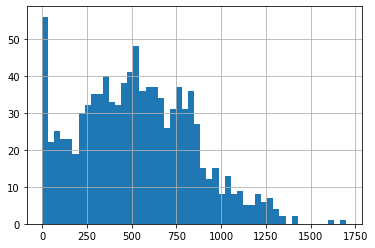

In [35]:
df_users_calc_pivot_ultra['calls_duration_ceil'].hist(bins=50, range=(0,1700))
# построим гистограмму звонков в тарифе ультра изучим эти данные

In [36]:
df_users_calc_pivot_ultra['calls_duration_ceil'].describe()
# получим список характерных значения для столбца calls_duration_ceil в тарифе ультра с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_duration_ceil, dtype: float64

In [37]:
np.var(df_users_calc_pivot_ultra['calls_duration_ceil'],ddof=1)
# посчитаем дисперсию с помощью метода var(), так как это выборка укажем ddof=1

100873.63339730098

Пик возле нуля говорит о большом количестве пропущенных звонков.

В тариф ультра включено 3000 минут разговора в месяц, можно сделать вывод, что этого значения никто из клиентов не превысил.Средняя и медиана близки по значениям, это говорит, что выбросов мало. Пик приходится на 530 минут. Третий квартиль у нас заканчивается на 752 минутах. Так что можно сказать, что можно снизить количество минут в тарифе до 1000.

<AxesSubplot:>

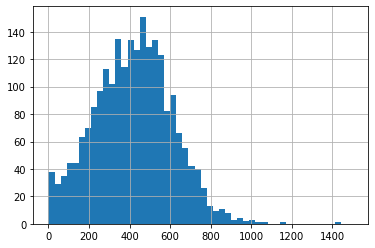

In [38]:
df_users_calc_pivot_smart['calls_duration_ceil'].hist(bins=50, range=(0,1500))
# построим гистограмму звонков в тарифе смарт изучим эти данные

In [39]:
df_users_calc_pivot_smart['calls_duration_ceil'].describe()
#  получим список характерных значения для столбца calls_duration_ceil в тарифе смарт с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_duration_ceil, dtype: float64

In [40]:
np.var(df_users_calc_pivot_smart['calls_duration_ceil'],ddof=1)
# посчитаем дисперсию с помощью метода var(), так как это выборка укажем ddof=1

36219.31578434428

В тариф смарт включено 500 минут разговора в месяц, можно сделать вывод, что этого большинство из клиентов попали в этот промежуток, но есть значительное число клиентов, которые превысили лимит.Средняя и медиана близки по значениям, это говорит, что выбросов мало. Пик приходится на 420 минут. Третий квартиль приходиться на 545 минут. Можно сказать, что большинство пользователей укладывается именно в этот период.

Абонентов тарифа смарт больше чем ультра. 

Среднее значение и стандартное отклонение минут тарифа ультра больше чем смарт.

<AxesSubplot:>

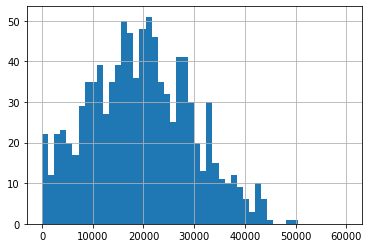

In [41]:
df_users_calc_pivot_ultra['traffic_month'].hist(bins=50, range=(0,60000))
# построим гистограмму по израсходованному интернет трафику в тарифе ультра изучим эти данные

In [42]:
df_users_calc_pivot_ultra['traffic_month'].describe()
#  получим список характерных значения для столбца traffic_month в тарифе ультра с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count      985.000000
mean     19468.805208
std      10087.170752
min          0.000000
25%      11770.260000
50%      19308.010000
75%      26837.690000
max      49745.690000
Name: traffic_month, dtype: float64

In [43]:
np.var(df_users_calc_pivot_ultra['traffic_month'],ddof=1)
# посчитаем дисперсию с помощью метода var(), так как это выборка укажем ddof=1

101751013.78335387

В тариф ультра включено 30 ГБ интернета. Можно сделать вывод, что многие укладываются в тариф,так как третий квартиль находиться в районе 27ГБ,  но так же есть значительное число клиентов, которые докупают дополнительный трафик.

<AxesSubplot:>

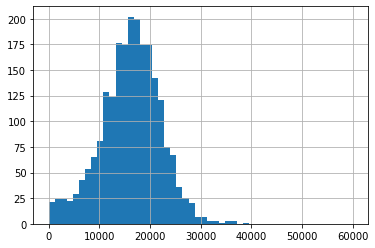

In [44]:
df_users_calc_pivot_smart['traffic_month'].hist(bins=50, range=(0,60000))
# постоим гистограмму по израсходованному интернет трафику в тарифе смарт изучим эти данные

In [45]:
df_users_calc_pivot_smart['traffic_month'].describe()
#  получим список характерных значения для столбца traffic_month в тарифе смарт с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count     2229.000000
mean     16208.386990
std       5870.476681
min          0.000000
25%      12643.010000
50%      16506.840000
75%      20042.930000
max      38552.450000
Name: traffic_month, dtype: float64

In [46]:
np.var(df_users_calc_pivot_smart['traffic_month'],ddof=1)
# посчитаем дисперсию с помощью метода var(), так как это выборка укажем ddof=1

34462496.46274242

В тариф смарт включено 15 ГБ интернета, можно сделать вывод, что большая доля клиентов докупают интернет трафик, так как пик приходиться на 16.5 ГБ, а третий квартиль находиться на отметке 20 ГБ. Дисперсия тарифа ультра больше чем в тарифе смарт.

<AxesSubplot:>

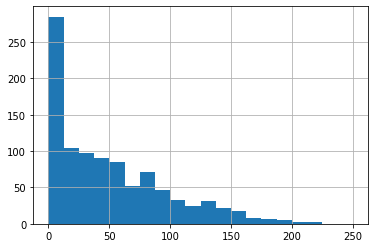

In [47]:
df_users_calc_pivot_ultra['messages_count'].hist(bins=20, range=(0,250))
# построим гистограмму отправленных сообщений в тарифе ультра изучим эти данные

In [48]:
df_users_calc_pivot_ultra['messages_count'].describe()
#  получим список характерных значения для столбца messages_count в тарифе ультра с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

In [49]:
np.var(df_users_calc_pivot_ultra['messages_count'],ddof=1)
# посчитаем дисперсию с помощью метода var(), так как это выборка укажем ddof=1

2285.266142544674

В тариф ультра включено 1000 сообщений в месяц. Данный лимит превышен не был, но есть большая разница между медианной и средней, что может говорить о длином хвосте высоких значений.Третий квартиль заканчивается на значении 79, можно сказать, в большинстве случаев этого количества сообщений достаточно.

<AxesSubplot:>

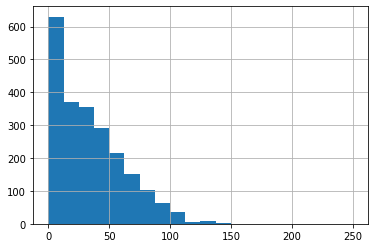

In [50]:
df_users_calc_pivot_smart['messages_count'].hist(bins=20, range=(0,250))
# построим гистограмму отправленных сообщений в тарифе смарт изучим эти данные

In [51]:
df_users_calc_pivot_smart['messages_count'].describe()
#  получим список характерных значения для столбца messages_count в тарифе смарт с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

In [52]:
np.var(df_users_calc_pivot_smart['messages_count'],ddof=1)
# посчитаем дисперсию с помощью метода var(), так как это выборка укажем ddof=1

796.8129584480083

В тариф смарт включено 50 сообщений. Судя по третьему квартилю можно сделать вывод, что значительная часть клиентов укладывается в этот лимит.

Дисперсия в тарифе ультра больше чем в смарт.

<AxesSubplot:>

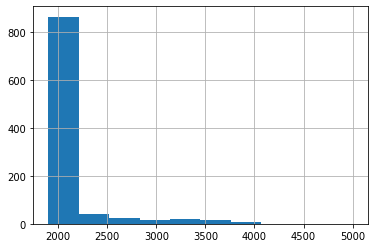

In [53]:
df_users_calc_pivot_ultra['total_sum_month'].hist(bins=10, range=(1900,5000))
# построим гистограмму помесячной выручки в тарифе ультра изучим эти данные

In [54]:
df_users_calc_pivot_ultra['total_sum_month'].describe()
#  получим список характерных значения для столбца total_sum_month в тарифе ультра с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_sum_month, dtype: float64

In [55]:
np.var(df_users_calc_pivot_ultra['total_sum_month'],ddof=1)

141516.7450786183

По этой гистрограмме для тарифа ультра можно сказать, что большинство клиентов укладывается в лимит и платят только абонентскую плату, но бывают случаи когда превышают его.

<AxesSubplot:>

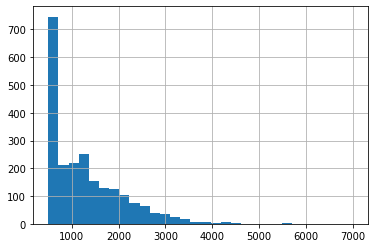

In [56]:
df_users_calc_pivot_smart['total_sum_month'].hist(bins=30, range=(500,7000))
#  получим список характерных значения для столбца total_sum_month в тарифе смарт с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

In [57]:
df_users_calc_pivot_smart['total_sum_month'].describe()
#  получим список характерных значения для столбца total_sum_month в тарифе смарт с помощью метода describe()
# здесь мы видим среднее(mean) и стандартное отклонение (std)

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: total_sum_month, dtype: float64

In [58]:
np.var(df_users_calc_pivot_smart['total_sum_month'],ddof=1)

669785.7080064242

Для тарифа смарт, можно сказать, что только четверть всех платежей не превышает стоимости тарифа, в остальных случаях клиент доплачивает. Довольно много клиентов по платежу приближаются к тарифу ультра. Возможно есть смысл предложить этим клиентам сменить тариф.

Посмотрим на взаимосвязь месяца и суммарного времени звонков, сообщений и трафика

In [59]:
df_users_calc_pivot_ultra_1 = df_users_calc_pivot_ultra.pivot_table(index=df_users_calc_pivot_ultra.index, values=[
    'month','traffic_month','calls_duration_ceil','messages_count'
], aggfunc='mean')
# создадим сводную таблицу для этих столбцов в тарифе ультра расчитав для них среднее

array([[<AxesSubplot:xlabel='calls_duration_ceil', ylabel='calls_duration_ceil'>,
        <AxesSubplot:xlabel='messages_count', ylabel='calls_duration_ceil'>,
        <AxesSubplot:xlabel='month', ylabel='calls_duration_ceil'>,
        <AxesSubplot:xlabel='traffic_month', ylabel='calls_duration_ceil'>],
       [<AxesSubplot:xlabel='calls_duration_ceil', ylabel='messages_count'>,
        <AxesSubplot:xlabel='messages_count', ylabel='messages_count'>,
        <AxesSubplot:xlabel='month', ylabel='messages_count'>,
        <AxesSubplot:xlabel='traffic_month', ylabel='messages_count'>],
       [<AxesSubplot:xlabel='calls_duration_ceil', ylabel='month'>,
        <AxesSubplot:xlabel='messages_count', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='traffic_month', ylabel='month'>],
       [<AxesSubplot:xlabel='calls_duration_ceil', ylabel='traffic_month'>,
        <AxesSubplot:xlabel='messages_count', ylabel='traffic_month'>,
        <AxesSubp

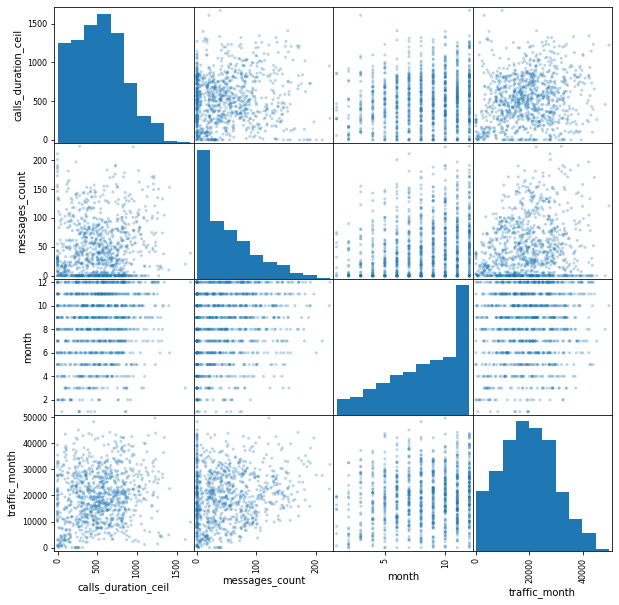

In [60]:
pd.plotting.scatter_matrix(df_users_calc_pivot_ultra_1, figsize=(10, 10), alpha=0.3)
# постоим матрицу диаграмм рассеяния

Для тарифа ультра можно сделать вывод, что есть рост количества звонков, сообщений и интернет трафика с начала к концу года.

array([[<AxesSubplot:xlabel='calls_duration_ceil', ylabel='calls_duration_ceil'>,
        <AxesSubplot:xlabel='messages_count', ylabel='calls_duration_ceil'>,
        <AxesSubplot:xlabel='month', ylabel='calls_duration_ceil'>,
        <AxesSubplot:xlabel='traffic_month', ylabel='calls_duration_ceil'>],
       [<AxesSubplot:xlabel='calls_duration_ceil', ylabel='messages_count'>,
        <AxesSubplot:xlabel='messages_count', ylabel='messages_count'>,
        <AxesSubplot:xlabel='month', ylabel='messages_count'>,
        <AxesSubplot:xlabel='traffic_month', ylabel='messages_count'>],
       [<AxesSubplot:xlabel='calls_duration_ceil', ylabel='month'>,
        <AxesSubplot:xlabel='messages_count', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='traffic_month', ylabel='month'>],
       [<AxesSubplot:xlabel='calls_duration_ceil', ylabel='traffic_month'>,
        <AxesSubplot:xlabel='messages_count', ylabel='traffic_month'>,
        <AxesSubp

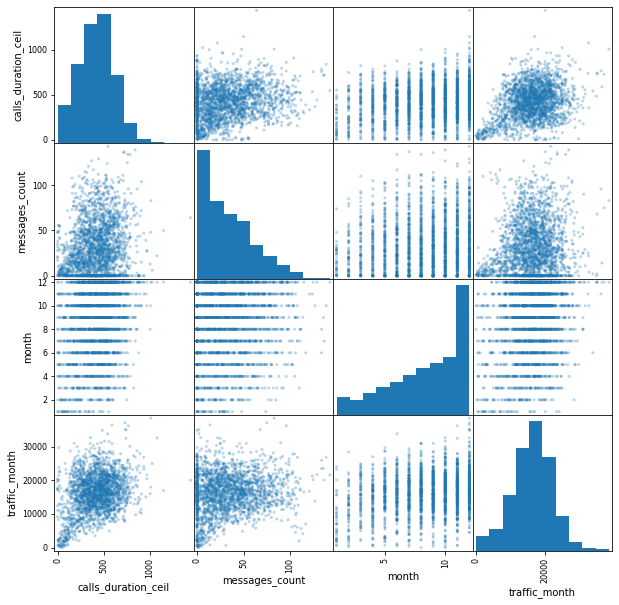

In [61]:
df_users_calc_pivot_smart_1 = df_users_calc_pivot_smart.pivot_table(index=df_users_calc_pivot_smart.index, values=[
    'month','traffic_month','calls_duration_ceil','messages_count'
], aggfunc='mean')
# создадим сводную таблицу для этих столбцов в тарифе ультра расчитав для них среднее
pd.plotting.scatter_matrix(df_users_calc_pivot_smart_1, figsize=(10, 10), alpha=0.3)
# постоим матрицу диаграмм рассеяния

В тарифе смарт тоже можем наблюдать, что  что есть рост количества звонков, сообщений и интернет трафика с начала к концу года.

Но если в тарифе ультра распределение значений более рассредоточено, то в тарифе смарт мы видим большую скученность значений.

Абонентов тарифа смарт больше чем ультра.
В тариф ультра включено 3000 минут разговора в месяц, никто из клиентов не превысил. Пик приходится на 530 минут. Третий квартиль тарифа ультра заканчивается на 752 минутах. Так что можно сказать, что можно снизить количество минут в тарифе до 1000.
В тариф смарт включено 500 минут разговора в месяц, большинство из клиентов попали в этот промежуток, но есть значительное число клиентов, которые превысили лимит. Пик приходится на 420 минут. Третий квартиль приходиться на 545 минут. Можно сказать, что большинство пользователей укладывается именно в эти значения. Среднее значение и стандартное отклонение минут тарифа ультра больше чем смарт, при этом дисперсия тарифа смарт больше ультра.

В тариф ультра включено 30 ГБ интернета. Можно сделать вывод, что многие укладываются в тариф,так как третий квартиль находиться в районе 27ГБ,  но так же есть значительное число клиентов, которые докупают дополнительный трафик. В тариф смарт включено 15 ГБ интернета, можно сделать вывод, что большая доля клиентов докупают интернет трафик, так как пик приходиться на 16.5 ГБ, а третий квартиль находиться на отметке 20 ГБ. Дисперсия тарифа ультра больше чем в тарифе смарт.

В тариф ультра включено 1000 сообщений в месяц. Данный лимит превышен не был, но есть большая разница между медианной и средней, что может говорить о длинном хвосте высоких значений. Третий квартиль заканчивается на значении 79, можно сказать, в большинстве случаев этого количества сообщений достаточно.
В тариф смарт включено 50 сообщений. Судя по третьему квартилю можно сделать вывод, что значительная часть клиентов укладывается в этот лимит. Дисперсия в тарифе ультра больше чем в смарт.

Для тарифа ультра можно сказать, что большинство клиентов укладывается в лимит и платят только абонентскую плату, но бывают случаи когда превышают его.Для тарифа смарт, можно сказать, что только четверть всех платежей не превышает стоимости тарифа, в остальных случаях клиент доплачивает. Довольно много клиентов по платежу приближаются к тарифу ультра. Возможно есть смысл предложить этим клиентам сменить тариф.

Однако, клиенты тарифа смарт приносят кам

Для  обоих тарифов  можно сделать вывод, что есть рост количества звонков, сообщений и интернет трафика с начала к концу года. Но если в тарифе ультра распределение значений более рассредоточено, то в тарифе смарт мы видим большую скученность значений.


## Проверка гипотез

**Проверим первую гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.**

Сформулируем нулевую и альтернативную гипотезы:

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;

H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

Чтобы проверить первую гипотезу используем метод scipy.stats.ttest_ind (array1, array2, equal_var)
- equal_var - параметр, задающий считать ли равными дисперсии выборок.
Так как мы знаем что дисперcии различаются equal_var = False


In [62]:
smart_ttest = df_users_calc_pivot[df_users_calc_pivot['tariff_name']=='smart']['total_sum_month']
ultra_ttest = df_users_calc_pivot[df_users_calc_pivot['tariff_name']=='ultra']['total_sum_month']

# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Можно сказать, что средняя выручка различается.

**Проверим вторую гипотезу - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**


Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;

Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.



In [63]:
moscow_ttest = df_users_calc_pivot[df_users_calc_pivot['city']=='Москва']['total_sum_month']

popmean =  df_users_calc_pivot[ df_users_calc_pivot['city']!='Москва']['total_sum_month']

# уровень значимости 5%
alpha = 0.05

results = st.ttest_ind(moscow_ttest, popmean)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Можно сказать, что выручка в регионах не отличается от выручки в Москве.

## Общий вывод

В выгруженных файлах получили  информацию о пользователях и тарифных планах, которые они используют и данные о звонках, сообщениях и интернет-трафике. Данные в таблицах отличаются по количеству.
В таблицу с информацией о звонках добавила столбец duration_ceil с округленными до минут в большую сторону значений длительности звонка(по условию проекта). Так же  посчитала количество сделанных звонков и израсходованных минут разговора, сообщений и объем израсходованного интернет- трафика в месяц для каждого пользователя и  помесячную выручку с каждого пользователя.
Абонентов тарифа смарт больше чем ультра.
Пользователи тарифа ультра не израсходуют заложенного в тариф количества минут  и сообщений, но бывает, что докупают интернет  трафик.
Пользователи тарифа смарт часто пользуются возможностью покупки дополнительных услуг  и по минутам и по количеству интернет-трафика, реже сообщений.
Количество использования связи растет с начала года к концу в обоих тарифах.
После проверки гипотез можно сказать, что выручка по тарифам различается, однако это не зависит от того где пользователь находиться в регионе или в Москве.
